In [3]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv(r"H:\DATA Analytics\Forage\quantium\QVI_data.csv")

In [5]:
dataset.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [6]:
total_sales_revenue = dataset['TOT_SALES'].sum()
print("Total Sales Revenue: ${:,.2f}".format(total_sales_revenue))


Total Sales Revenue: $1,933,115.00


In [7]:
# there  is no customer column therefore we use TXN_ID because it's unique for every individual.

total_customers = dataset['TXN_ID'].nunique()
print("Total number of unique customers:", total_customers)

Total number of unique customers: 263125


In [8]:
transactions_per_customer = dataset.groupby('TXN_ID')['PROD_NBR'].nunique()

average_transactions = transactions_per_customer.mean()
print("Average number of transactions per customer: {:.2f}".format(average_transactions))


Average number of transactions per customer: 1.01


<Axes: title={'center': 'Number of Transactions Over the Year'}, xlabel='DATE'>

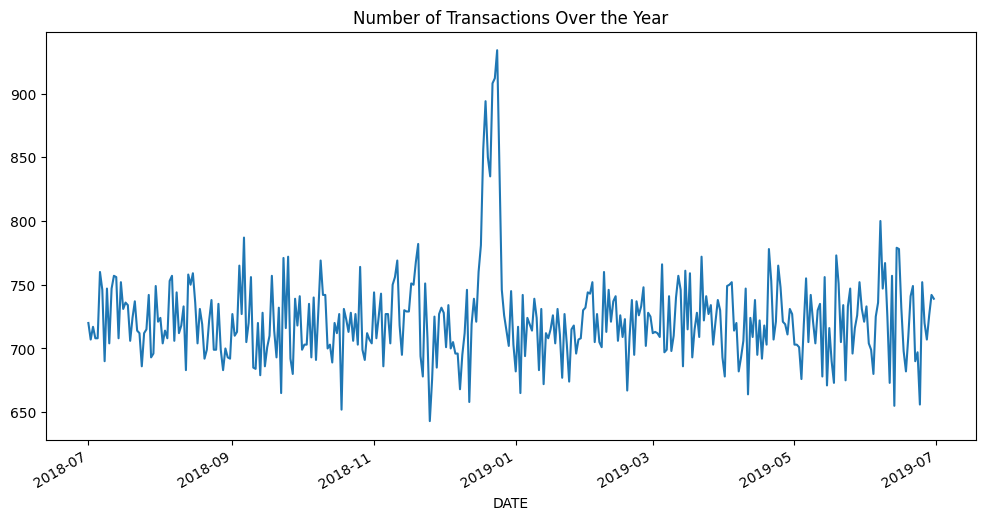

In [9]:
# Convert DATE column to datetime if not already
dataset['DATE'] = pd.to_datetime(dataset['DATE'])

# Group by date and count transactions
transactions_per_date = dataset.groupby('DATE')['TXN_ID'].nunique()

# Plot the line chart
transactions_per_date.plot(kind='line', figsize=(12, 6), title='Number of Transactions Over the Year')

<Axes: title={'center': 'Average Units per Transaction by Lifestage and Premium Customer'}, xlabel='LIFESTAGE', ylabel='Average Units'>

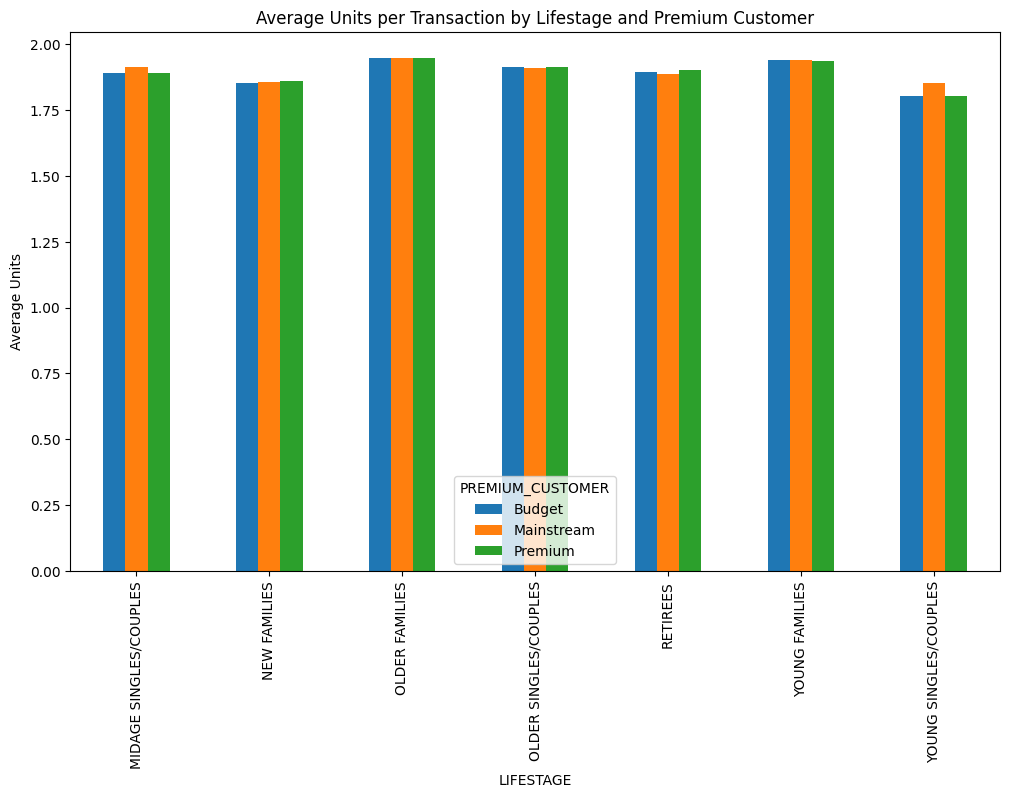

In [11]:
# Calculate average units per transaction for each combination of LIFESTAGE and PREMIUM_CUSTOMER
avg_units = dataset.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().unstack()

# Plot bar chart
avg_units.plot(kind='bar', figsize=(12, 7), title='Average Units per Transaction by Lifestage and Premium Customer', ylabel='Average Units')

<Axes: title={'center': 'Average Units per Transaction by Lifestage'}, xlabel='LIFESTAGE', ylabel='Average Units'>

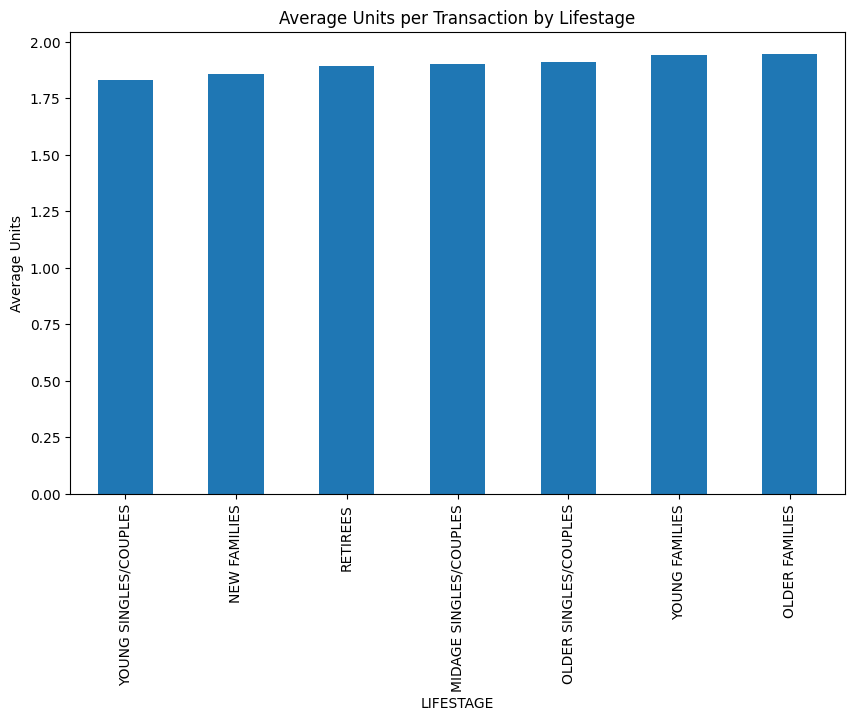

In [10]:
# Calculate average units per transaction for each lifestage
avg_units_per_lifestage = dataset.groupby('LIFESTAGE')['PROD_QTY'].mean().sort_values()

# Plot bar chart
avg_units_per_lifestage.plot(kind='bar', figsize=(10, 6), title='Average Units per Transaction by Lifestage', ylabel='Average Units')

In [12]:
dataset.head(1)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium


<Axes: title={'center': 'Proportion of All Customers vs Premium Customers by Lifestage'}, xlabel='LIFESTAGE'>

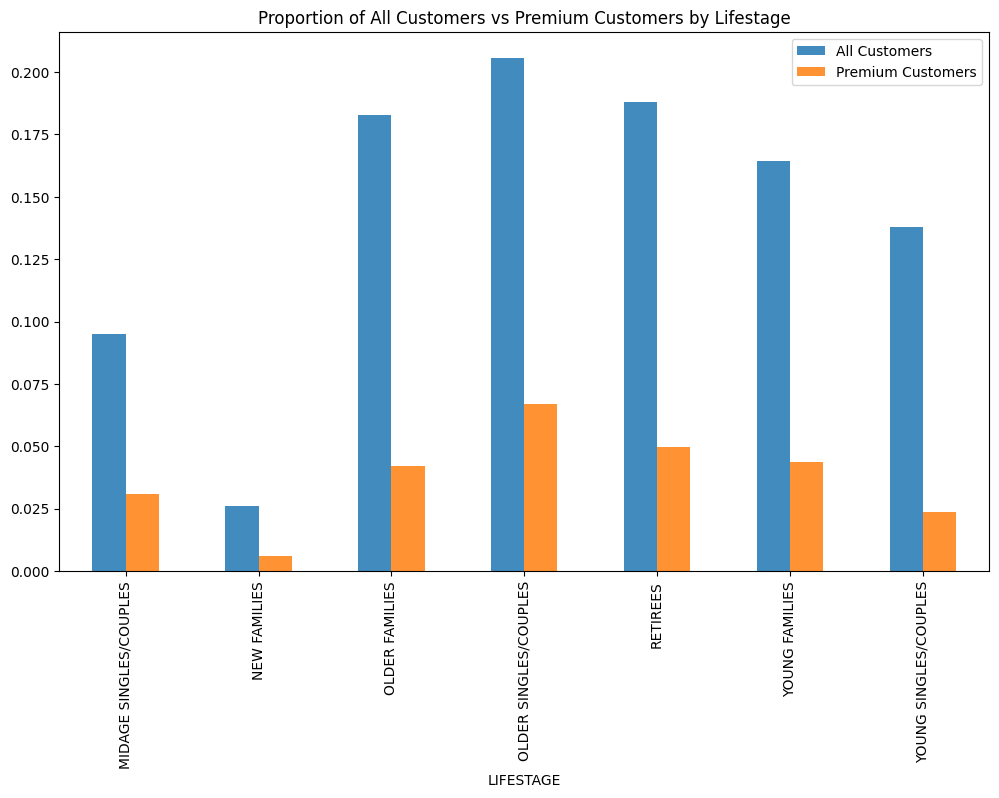

In [13]:
# Calculate total number of customers per lifestage
lifestage_counts = dataset.groupby('LIFESTAGE')['TXN_ID'].nunique()

# Calculate number of premium customers per lifestage
premium_counts = dataset[dataset['PREMIUM_CUSTOMER'] == 'Premium'].groupby('LIFESTAGE')['TXN_ID'].nunique()

# Calculate proportions
lifestage_prop = lifestage_counts / lifestage_counts.sum()
premium_prop = premium_counts / lifestage_counts.sum()

# Combine into a DataFrame for plotting
proportion_df = pd.DataFrame({
    'All Customers': lifestage_prop,
    'Premium Customers': premium_prop
})

# Plot overlap bar chart
proportion_df.plot(kind='bar', figsize=(12, 7), alpha=0.85, title='Proportion of All Customers vs Premium Customers by Lifestage')